# Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio

In [2]:
img = imageio.imread('nature.png')
img = img.astype(np.float32) / 255
img.shape

(917, 1600, 3)

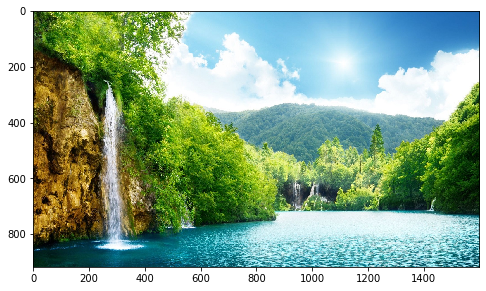

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [4]:
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

Text(0.5, 1.0, 'Blue')

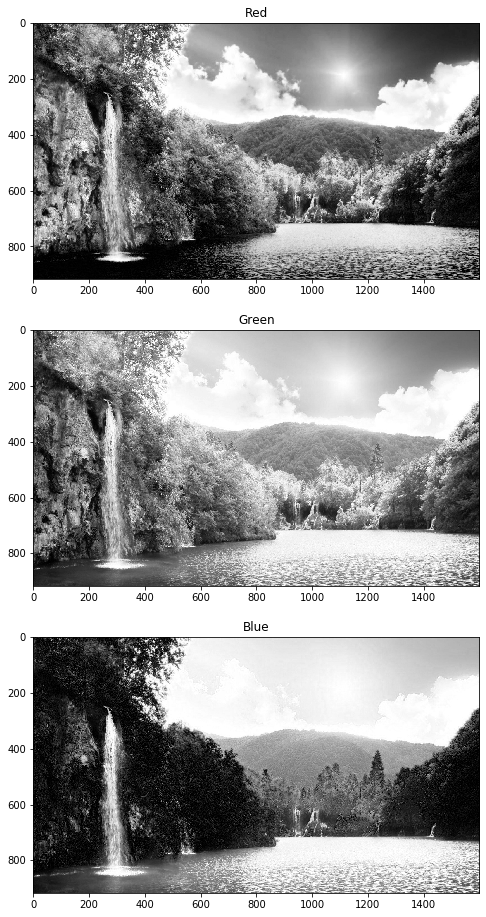

In [5]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 1, 1)
plt.imshow(red, cmap='gray')
plt.title('Red')

plt.subplot(3, 1, 2)
plt.imshow(green, cmap='gray')
plt.title('Green')

plt.subplot(3, 1, 3)
plt.imshow(blue, cmap='gray')
plt.title('Blue')

# BlueUp

Text(0.5, 1.0, 'BlueUp')

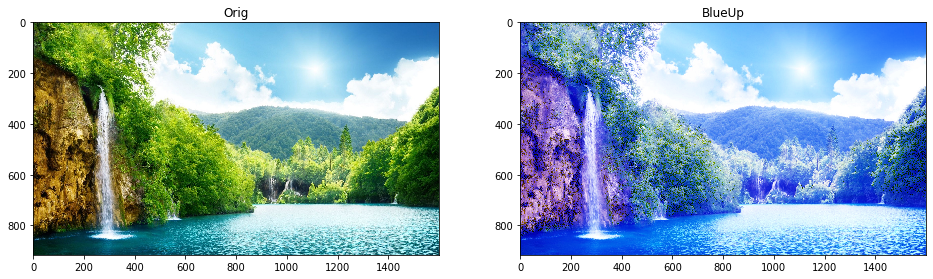

In [6]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Orig')

img_blueup = img.copy()
img_blueup[:, :, 2] = img_blueup[:, :, 2] ** 0.1
plt.subplot(1, 2, 2)
plt.imshow(img_blueup)
plt.title('BlueUp')

# Inverse

Text(0.5, 1.0, 'Inverse')

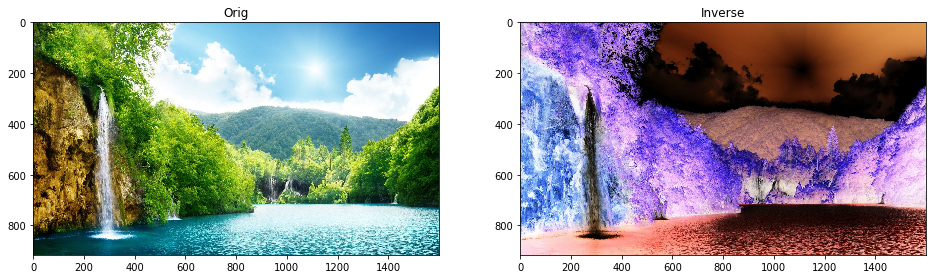

In [7]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Orig')

img_inverse = img.copy()
img_inverse = np.ones((img_inverse.shape[0], img_inverse.shape[1], 3)) + img_inverse * -1

plt.subplot(1, 2, 2)
plt.imshow(img_inverse)
plt.title('Inverse')

# Volume

(9, 9)


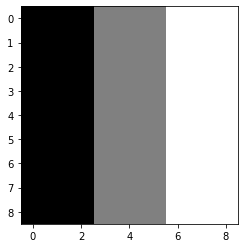

In [8]:
size = 9
win_size = (size, size)

w = np.ones(win_size)
w[:, size//3:] = 1
w[:, size//3:size//3*2] = 0
w[:, :size//3] = -1

print(w.shape)
plt.imshow(w, cmap='gray')

In [9]:
%%time
img_copy = img.copy()
img_copy = img_copy.mean(axis=2)

out_img = np.zeros((img_copy.shape[0] - w.shape[0] + 1, 
                    img_copy.shape[1] - w.shape[1] + 1), 
                   dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+w.shape[0], j:j+w.shape[1]]
        out_img[i, j] = np.sum(w * x)

Wall time: 10.5 s


Text(0.5, 1.0, 'Volume')

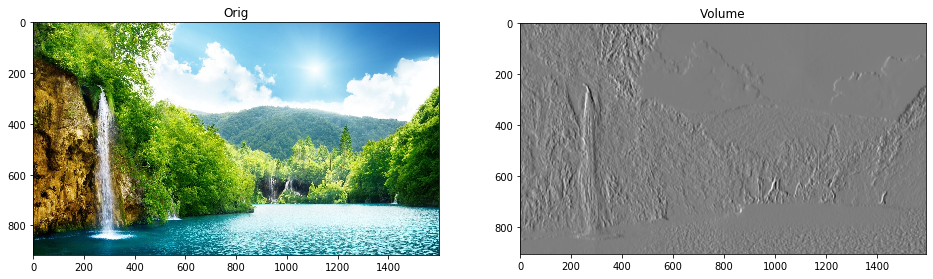

In [10]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Orig')

img_max = img.copy()
plt.subplot(1, 2, 2)
plt.imshow(out_img, cmap='gray')
plt.title('Volume')